In [2]:
# Note: this block of code must be run in order for anything to work.
# It is also vital that blocks of code are run in the order seen on this page,
# otherwise the dataset and classification trees will not be compiled properly.
# You've been warned!

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
from sklearn.tree import export_graphviz
import random
import io
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [4]:
# To load in the data, download the 'Ontario_COVID_Data' file in the folder, then
# run this cell, click choose files, and upload that file
from google.colab import files

uploaded = files.upload()

Saving Ontario_COVID_Data.csv to Ontario_COVID_Data.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Ontario_COVID_Data.csv']), sep = ',')
data.columns = ['Case_Reported_Date', 'Age_Group', 'Gender', 'Method_of_Acquisition', 'City']
data.head()

Case_Reported_Date Age_Group  Gender Method_of_Acquisition         City
0  2020-05-16T00:00:00       30s  FEMALE                    OB  Mississauga
1  2020-05-01T00:00:00       50s  FEMALE                    OB  Mississauga
2  2020-04-17T00:00:00       40s  FEMALE                    OB  Mississauga
3  2020-07-07T00:00:00       40s    MALE                    OB  Mississauga
4  2020-04-20T00:00:00       30s  FEMALE                    OB  Mississauga

In [ ]:
month_list = []
year_list = []

for i in range(65533):
  month_list.append(data['Case_Reported_Date'][i][5:7])
  year_list.append(data['Case_Reported_Date'][i][:4])

data['Month'] = month_list
data['Year'] = year_list

In [ ]:
new_month_list = []
new_year_list = []
new_age_group_list = []
new_gender_list = []
new_moa_list = []
new_city_list = []

for j in range(65533):
  if data['Year'][j] == '2021':
    new_month_list.append(data['Month'][j])
    new_year_list.append(data['Year'][j])
    new_age_group_list.append(data['Age_Group'][j])
    new_gender_list.append(data['Gender'][j])
    new_moa_list.append(data['Method_of_Acquisition'][j])
    new_city_list.append(data['City'][j])

new_data = {'Month': new_month_list,
            'Year': new_year_list,
            'Age_Group': new_age_group_list,
            'Gender': new_gender_list,
            'Method_of_Acquisition': new_moa_list,
            'City': new_city_list}

new_dataframe = pd.DataFrame(new_data, columns = ['Month', 'Year', 'Age_Group', 'Gender', 'Method_of_Acquisition', 'City'])

city_dict = {'Toronto': 0, 'Mississauga': 1, 'Newmarket': 2, 'Windsor': 3, 'Thorold': 4,
             'Ottawa': 5, 'Hamilton': 6, 'Waterloo': 7, 'Whitby': 8, 'London': 9, 
             'Oakville': 10, 'Barrie': 11, 'Guelph': 12, 'Point Edward': 13, 'Cornwall': 14,
             'St. Thomas': 15, 'Thunder Bay': 16, 'Stratford': 17, 'Chatham': 18, 
             'Brantford': 19, 'Port Hope': 20, 'Sudbury': 21, 'Simcoe': 22, 'Kenora': 23,
             'Peterborough': 24, 'Timmins': 25, 'Owen Sound': 26, 'Brockville': 27,
             'Kingston': 28, 'Pembroke': 29, 'Sault Ste. Marie': 30, 'North Bay': 31,
             'Belleville': 32, 'New Liskeard': 33}
moa_dict = {'CC': 0, 'NO KNOWN EPI LINK': 1, 'OB': 2, 'MISSING INFORMATION': 3, 'TRAVEL': 4}

for a in range(20911):
  new_dataframe['Method_of_Acquisition'][a] = moa_dict[new_dataframe['Method_of_Acquisition'][a]]
  new_dataframe['City'][a] = city_dict[new_dataframe['City'][a]]

new_dataframe

Month  Year Age_Group  Gender Method_of_Acquisition City
0        01  2021       60s    MALE                     1    8
1        01  2021       20s    MALE                     1    7
2        01  2021       40s    MALE                     0   12
3        01  2021       60s    MALE                     0    2
4        01  2021       30s    MALE                     0    7
...     ...   ...       ...     ...                   ...  ...
20906    02  2021       60s  FEMALE                     0    3
20907    02  2021       50s  FEMALE                     0    6
20908    02  2021       20s    MALE                     0    1
20909    02  2021       40s    MALE                     2    4
20910    02  2021       <20    MALE                     1    1

[20911 rows x 6 columns]

In [ ]:
random.seed(859)

variant_list = []
for x in range(20911):
  variant_list.append('None')

# Numbers below were obtained from page 17 of the third URL linked on the Devpost

# format for below: [19 and under, 20-39, 40-59, 60-79, 80 and over]
uk_male = [67, 188, 138, 74, 32] 
uk_female = [71, 197, 144, 78, 33]
sa_male = [1, 9, 7, 5, 1]
sa_female = [1, 8, 6, 4, 1]
brazil_male = [3, 9, 7, 2, 0]
brazil_female = [1, 6, 4, 2, 0]
variant_options = ['UK', 'South Africa', 'Brazil']
for k in range(20911):
  var = random.randint(0, 2)
  if new_dataframe['Gender'][k] == 'MALE':
    if new_dataframe['Age_Group'][k] == '<20':
      if var == 0 and uk_male[0] != 0:
        variant_list[k] = variant_options[var]
        uk_male[0] -= 1
      elif var == 1 and sa_male[0] != 0:
        variant_list[k] = variant_options[var]
        sa_male[0] -= 1
      elif var == 2 and brazil_male[0] != 0:
        variant_list[k] = variant_options[var]
        brazil_male[0] -= 1
    elif new_dataframe['Age_Group'][k] == '20s' or new_dataframe['Age_Group'][k] == '30s':
      if var == 0 and uk_male[1] != 0:
        variant_list[k] = variant_options[var]
        uk_male[1] -= 1
      elif var == 1 and sa_male[1] != 0:
        variant_list[k] = variant_options[var]
        sa_male[1] -= 1
      elif var == 2 and brazil_male[1] != 0:
        variant_list[k] = variant_options[var]
        brazil_male[1] -= 1
    elif new_dataframe['Age_Group'][k] == '40s' or new_dataframe['Age_Group'][k] == '50s':
      if var == 0 and uk_male[2] != 0:
        variant_list[k] = variant_options[var]
        uk_male[2] -= 1
      elif var == 1 and sa_male[2] != 0:
        variant_list[k] = variant_options[var]
        sa_male[2] -= 1
      elif var == 2 and brazil_male[2] != 0:
        variant_list[k] = variant_options[var]
        brazil_male[2] -= 1
    elif new_dataframe['Age_Group'][k] == '60s' or new_dataframe['Age_Group'][k] == '70s':
      if var == 0 and uk_male[3] != 0:
        variant_list[k] = variant_options[var]
        uk_male[3] -= 1
      elif var == 1 and sa_male[3] != 0:
        variant_list[k] = variant_options[var]
        sa_male[3] -= 1
      elif var == 2 and brazil_male[3] != 0:
        variant_list[k] = variant_options[var]
        brazil_male[3] -= 1
    elif new_dataframe['Age_Group'][k] == '80s': #or new_dataframe['Age_Group'][k] == '90s':
      if var == 0 and uk_male[4] != 0:
        variant_list[k] = variant_options[var]
        uk_male[4] -= 1
      elif var == 1 and sa_male[4] != 0:
        variant_list[k] = variant_options[var]
        sa_male[4] -= 1
      elif var == 2 and brazil_male[4] != 0:
        variant_list[k] = variant_options[var]
        brazil_male[4] -= 1

  else:
    if new_dataframe['Age_Group'][k] == '<20':
      if var == 0 and uk_female[0] != 0:
        variant_list[k] = variant_options[var]
        uk_female[0] -= 1
      elif var == 1 and sa_female[0] != 0:
        variant_list[k] = variant_options[var]
        sa_female[0] -= 1
      elif var == 2 and brazil_female[0] != 0:
        variant_list[k] = variant_options[var]
        brazil_female[0] -= 1
    elif new_dataframe['Age_Group'][k] == '20s' or new_dataframe['Age_Group'][k] == '30s':
      if var == 0 and uk_female[1] != 0:
        variant_list[k] = variant_options[var]
        uk_female[1] -= 1
      elif var == 1 and sa_female[1] != 0:
        variant_list[k] = variant_options[var]
        sa_female[1] -= 1
      elif var == 2 and brazil_female[1] != 0:
        variant_list[k] = variant_options[var]
        brazil_female[1] -= 1
    elif new_dataframe['Age_Group'][k] == '40s' or new_dataframe['Age_Group'][k] == '50s':
      if var == 0 and uk_female[2] != 0:
        variant_list[k] = variant_options[var]
        uk_female[2] -= 1
      elif var == 1 and sa_female[2] != 0:
        variant_list[k] = variant_options[var]
        sa_female[2] -= 1
      elif var == 2 and brazil_female[2] != 0:
        variant_list[k] = variant_options[var]
        brazil_female[2] -= 1
    elif new_dataframe['Age_Group'][k] == '60s' or new_dataframe['Age_Group'][k] == '70s':
      if var == 0 and uk_female[3] != 0:
        variant_list[k] = variant_options[var]
        uk_female[3] -= 1
      elif var == 1 and sa_female[3] != 0:
        variant_list[k] = variant_options[var]
        sa_female[3] -= 1
      elif var == 2 and brazil_female[3] != 0:
        variant_list[k] = variant_options[var]
        brazil_female[3] -= 1
    elif new_dataframe['Age_Group'][k] == '80s': #or new_dataframe['Age_Group'][k] == '90s':
      if var == 0 and uk_female[4] != 0:
        variant_list[k] = variant_options[var]
        uk_female[4] -= 1
      elif var == 1 and sa_female[4] != 0:
        variant_list[k] = variant_options[var]
        sa_female[4] -= 1
      elif var == 2 and brazil_female[4] != 0:
        variant_list[k] = variant_options[var]
        brazil_female[4] -= 1

new_dataframe['Variants'] = variant_list

new_dataframe


Month  Year Age_Group  Gender Method_of_Acquisition City Variants
0        01  2021       60s    MALE                     1    8   Brazil
1        01  2021       20s    MALE                     1    7       UK
2        01  2021       40s    MALE                     0   12       UK
3        01  2021       60s    MALE                     0    2       UK
4        01  2021       30s    MALE                     0    7   Brazil
...     ...   ...       ...     ...                   ...  ...      ...
20906    02  2021       60s  FEMALE                     0    3     None
20907    02  2021       50s  FEMALE                     0    6     None
20908    02  2021       20s    MALE                     0    1     None
20909    02  2021       40s    MALE                     2    4     None
20910    02  2021       <20    MALE                     1    1     None

[20911 rows x 7 columns]

In [ ]:
gender_dict = {'MALE': 0, 'FEMALE': 1, 'UNSPECIFIED': 2, 'GENDER DIVERSE': 3}
age_dict = {'20s': 0, '30s': 1, '50s': 2, '40s': 3, '<20': 4, '60s': 5, '70s': 6,
            '80s': 7, '90+': 8, 'UNKNOWN': 9}

for b in range(20911):
  new_dataframe['Age_Group'][b] = age_dict[new_dataframe['Age_Group'][b]]
  new_dataframe['Gender'][b] = gender_dict[new_dataframe['Gender'][b]]
  
new_dataframe

Month  Year Age_Group Gender Method_of_Acquisition City Variants
0        01  2021         5      0                     1    8   Brazil
1        01  2021         0      0                     1    7       UK
2        01  2021         3      0                     0   12       UK
3        01  2021         5      0                     0    2       UK
4        01  2021         1      0                     0    7   Brazil
...     ...   ...       ...    ...                   ...  ...      ...
20906    02  2021         5      1                     0    3     None
20907    02  2021         2      1                     0    6     None
20908    02  2021         0      0                     0    1     None
20909    02  2021         3      0                     2    4     None
20910    02  2021         4      0                     1    1     None

[20911 rows x 7 columns]

This is the beginning of the set of 3 classification trees that are a part of this model. Using your age, gender, most likely fashion to have been exposed to the virus, and city resided in, trace each tree (using the appropriate branches) until you reach a leaf node, which will tell you your predicted variant. After tracing through all 3 trees, there will be 1 variant that was selected the most times, and that is the variant you are most likely to be exposed to.

Refer to the below keys for numberings: \
Age Group: {'20s': 0, '30s': 1, '50s': 2, '40s': 3, '<20': 4, '60s': 5, '70s': 6, '80s': 7, '90+': 8, 'Unknown': 9} \
Gender: {'Male': 0, 'Female': 1, 'Unspecified': 2, 'Gender diverse': 3} \
Method of Contracting the Virus: {'Close contact': 0, 'No known epidemiological link': 1, 'Outbreak': 2, 'Missing information': 3, 'Travel': 4} \
City lived in: {'Toronto': 0, 'Mississauga': 1, 'Newmarket': 2, 'Windsor': 3, 'Thorold': 4, 'Ottawa': 5, 'Hamilton': 6, 'Waterloo': 7, 'Whitby': 8, 'London': 9, 'Oakville': 10, 'Barrie': 11, 'Guelph': 12, 'Point Edward': 13, 'Cornwall': 14, 'St. Thomas': 15, 'Thunder Bay': 16, 'Stratford': 17, 'Chatham': 18, 'Brantford': 19, 'Port Hope': 20, 'Sudbury': 21, 'Simcoe': 22, 'Kenora': 23,'Peterborough': 24, 'Timmins': 25, 'Owen Sound': 26, 'Brockville': 27, Kingston': 28, 'Pembroke': 29, 'Sault Ste. Marie': 30, 'North Bay': 31, 'Belleville': 32, 'New Liskeard': 33}

Accuracy: 0.9014084507042254


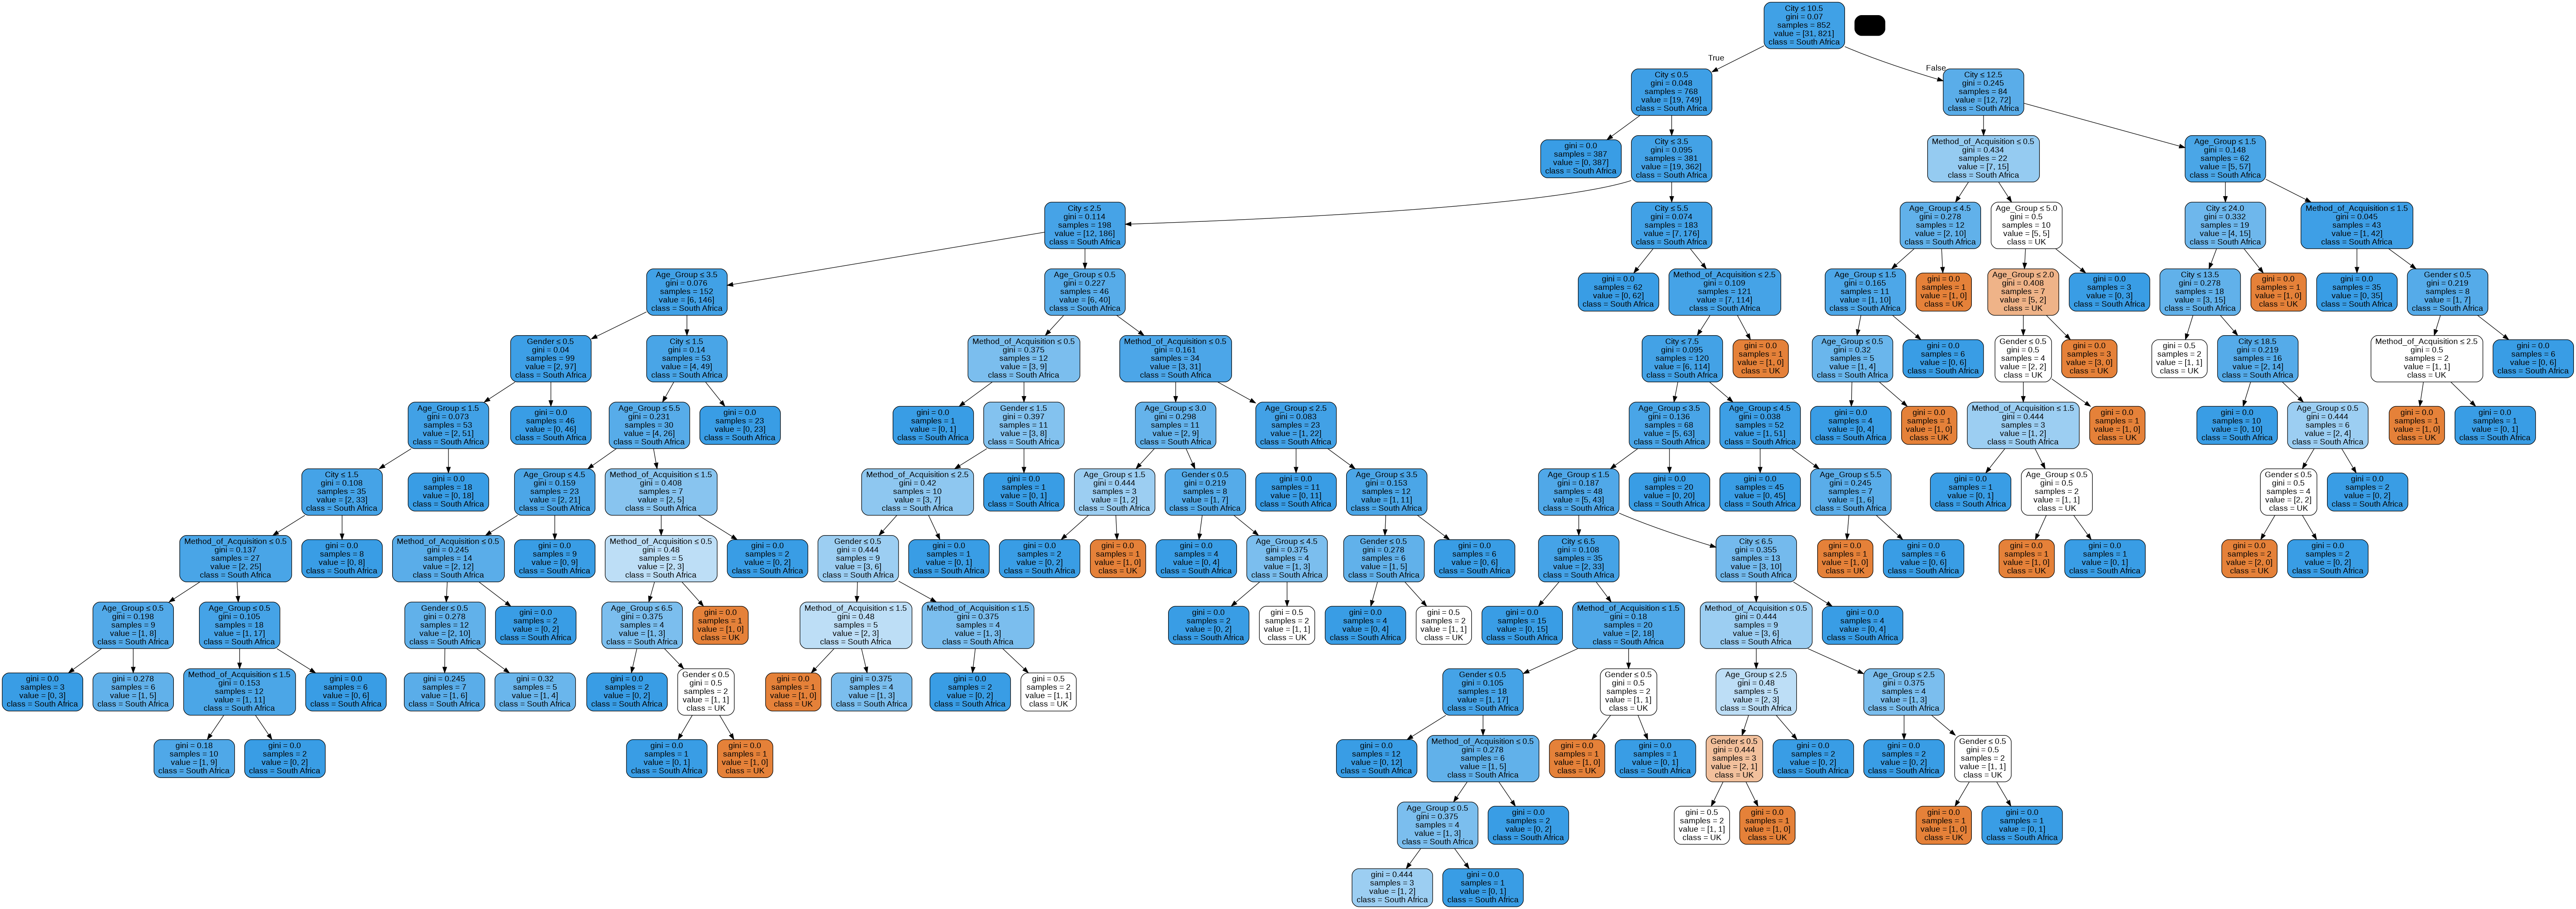

In [ ]:
#UK vs South Africa:
uk_sa_month = []
uk_sa_year = []
uk_sa_age_group = []
uk_sa_gender = []
uk_sa_moa = []
uk_sa_city = []
uk_sa_variant = []

for c in range(20911):
  if new_dataframe['Variants'][c] == 'South Africa' or new_dataframe['Variants'][c] == 'UK':
    uk_sa_month.append(new_dataframe['Month'][c])
    uk_sa_year.append(new_dataframe['Year'][c])
    uk_sa_age_group.append(new_dataframe['Age_Group'][c])
    uk_sa_gender.append(new_dataframe['Gender'][c])
    uk_sa_moa.append(new_dataframe['Method_of_Acquisition'][c])
    uk_sa_city.append(new_dataframe['City'][c])
    uk_sa_variant.append(new_dataframe['Variants'][c])

uk_sa_data = {'Month': uk_sa_month,
            'Year': uk_sa_year,
            'Age_Group': uk_sa_age_group,
            'Gender': uk_sa_gender,
            'Method_of_Acquisition': uk_sa_moa,
            'City': uk_sa_city,
            'Variants': uk_sa_variant}

uk_sa_dataframe = pd.DataFrame(uk_sa_data, columns=['Month', 'Year', 'Age_Group', 'Gender', 'Method_of_Acquisition', 'City', 'Variants'])

feature_cols = ['Age_Group', 'Gender', 'Method_of_Acquisition', 'City']
X = uk_sa_dataframe[feature_cols] # Features
y = uk_sa_dataframe.Variants # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['UK','South Africa'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


Accuracy: 0.9575471698113207


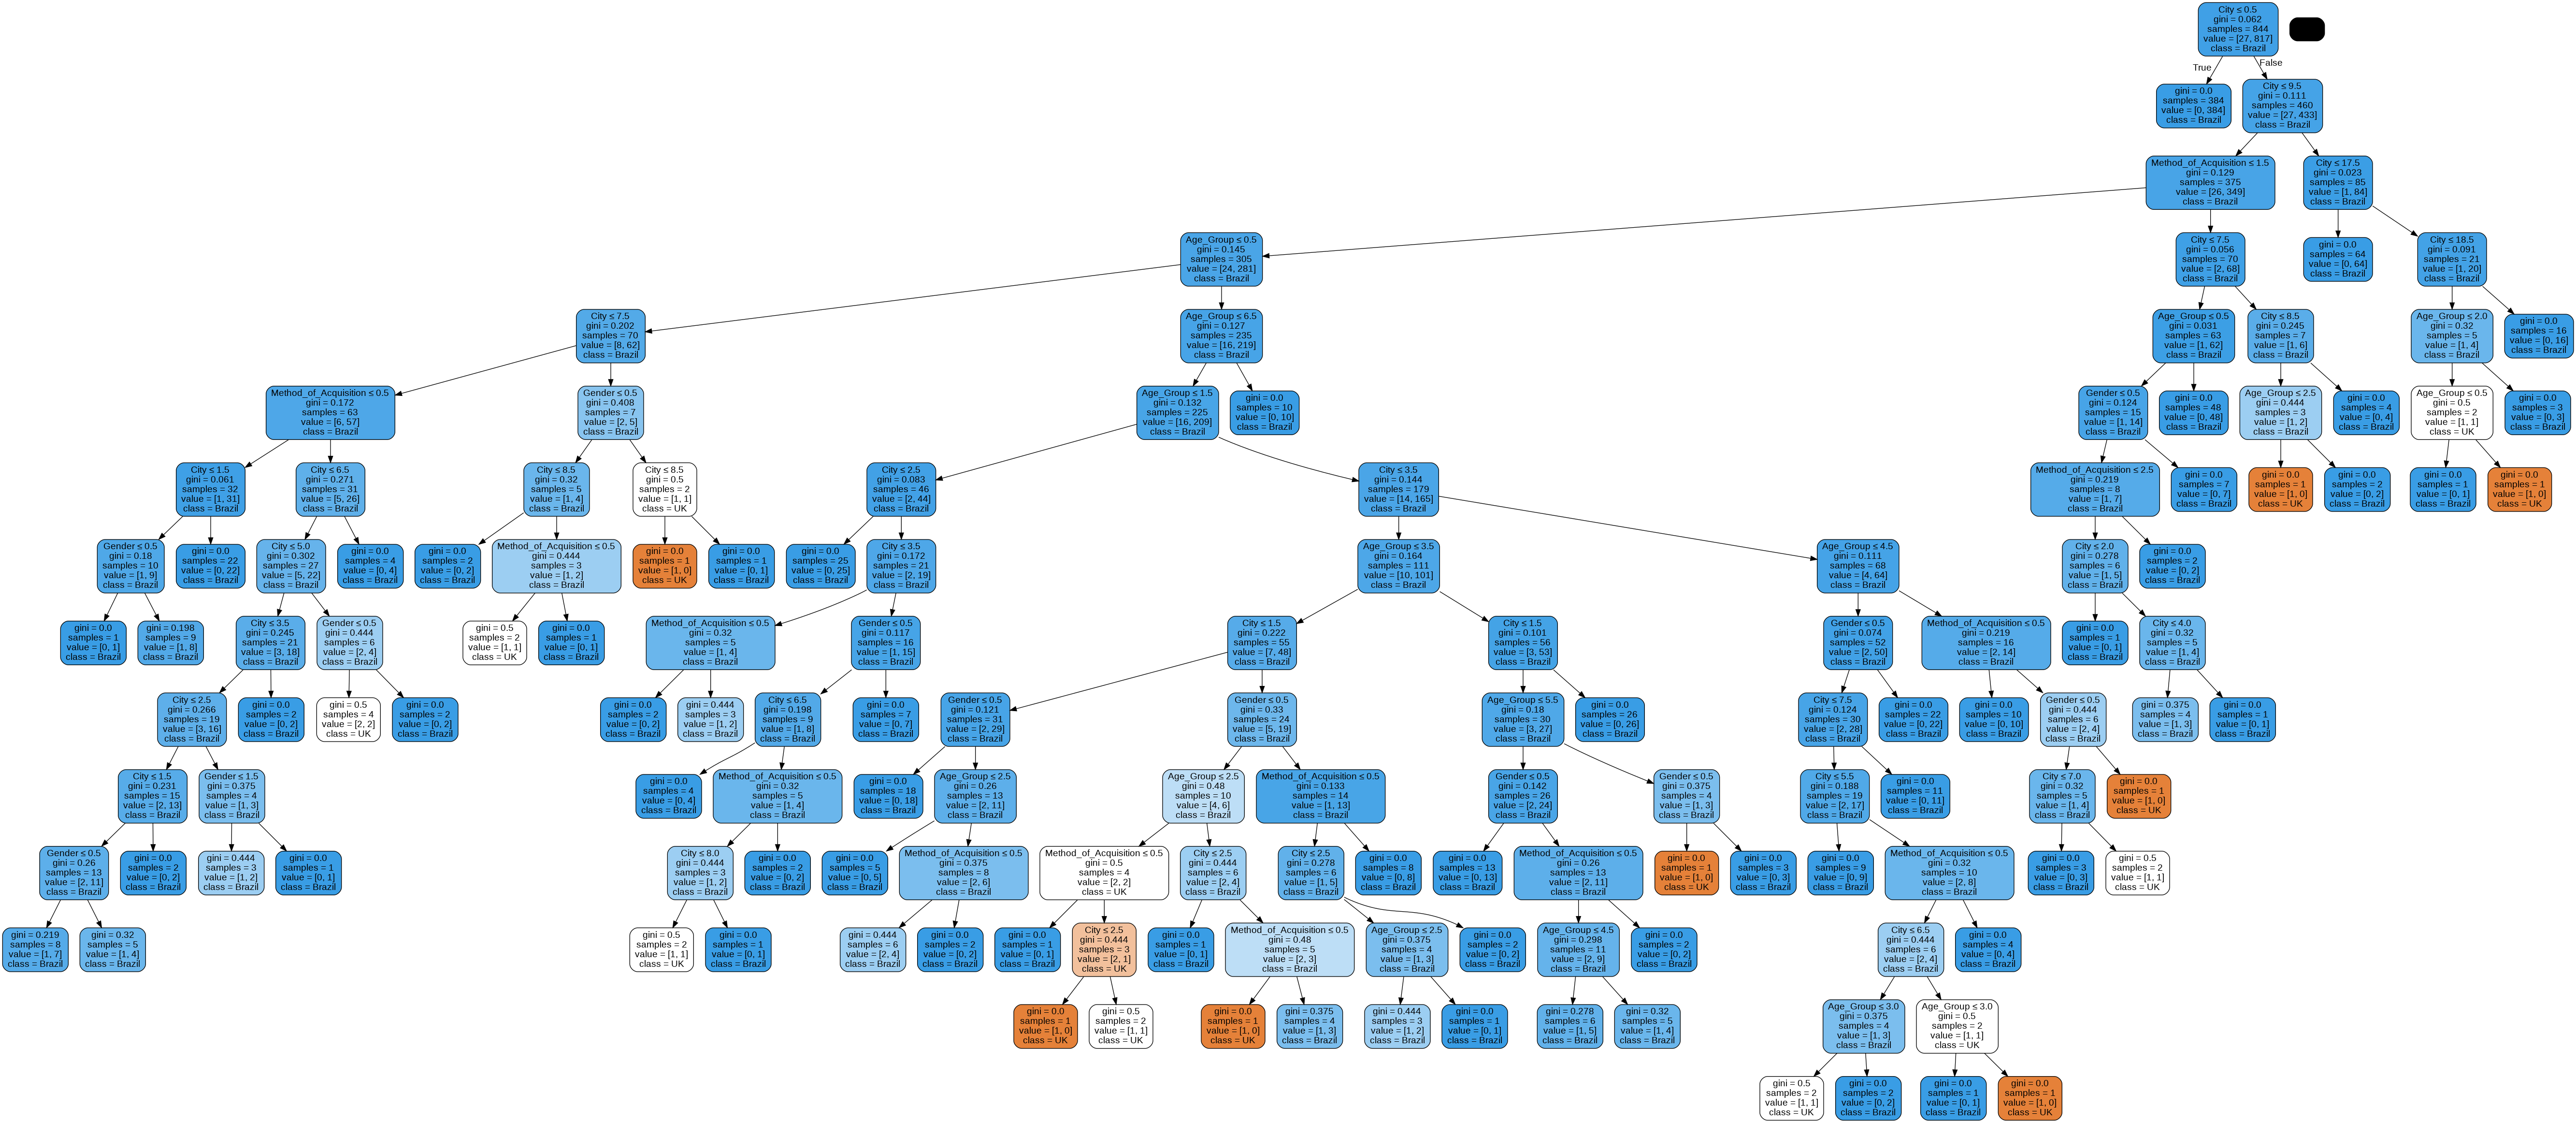

In [ ]:
#UK vs Brazil:
uk_bra_month = []
uk_bra_year = []
uk_bra_age_group = []
uk_bra_gender = []
uk_bra_moa = []
uk_bra_city = []
uk_bra_variant = []

for c in range(20911):
  if new_dataframe['Variants'][c] == 'UK' or new_dataframe['Variants'][c] == 'Brazil':
    uk_bra_month.append(new_dataframe['Month'][c])
    uk_bra_year.append(new_dataframe['Year'][c])
    uk_bra_age_group.append(new_dataframe['Age_Group'][c])
    uk_bra_gender.append(new_dataframe['Gender'][c])
    uk_bra_moa.append(new_dataframe['Method_of_Acquisition'][c])
    uk_bra_city.append(new_dataframe['City'][c])
    uk_bra_variant.append(new_dataframe['Variants'][c])

uk_bra_data = {'Month': uk_bra_month,
            'Year': uk_bra_year,
            'Age_Group': uk_bra_age_group,
            'Gender': uk_bra_gender,
            'Method_of_Acquisition': uk_bra_moa,
            'City': uk_bra_city,
            'Variants': uk_bra_variant}

uk_bra_dataframe = pd.DataFrame(uk_bra_data, columns=['Month', 'Year', 'Age_Group', 'Gender', 'Method_of_Acquisition', 'City', 'Variants'])

feature_cols = ['Age_Group', 'Gender', 'Method_of_Acquisition', 'City']
X = uk_bra_dataframe[feature_cols] # Features
y = uk_bra_dataframe.Variants # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['UK','Brazil'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

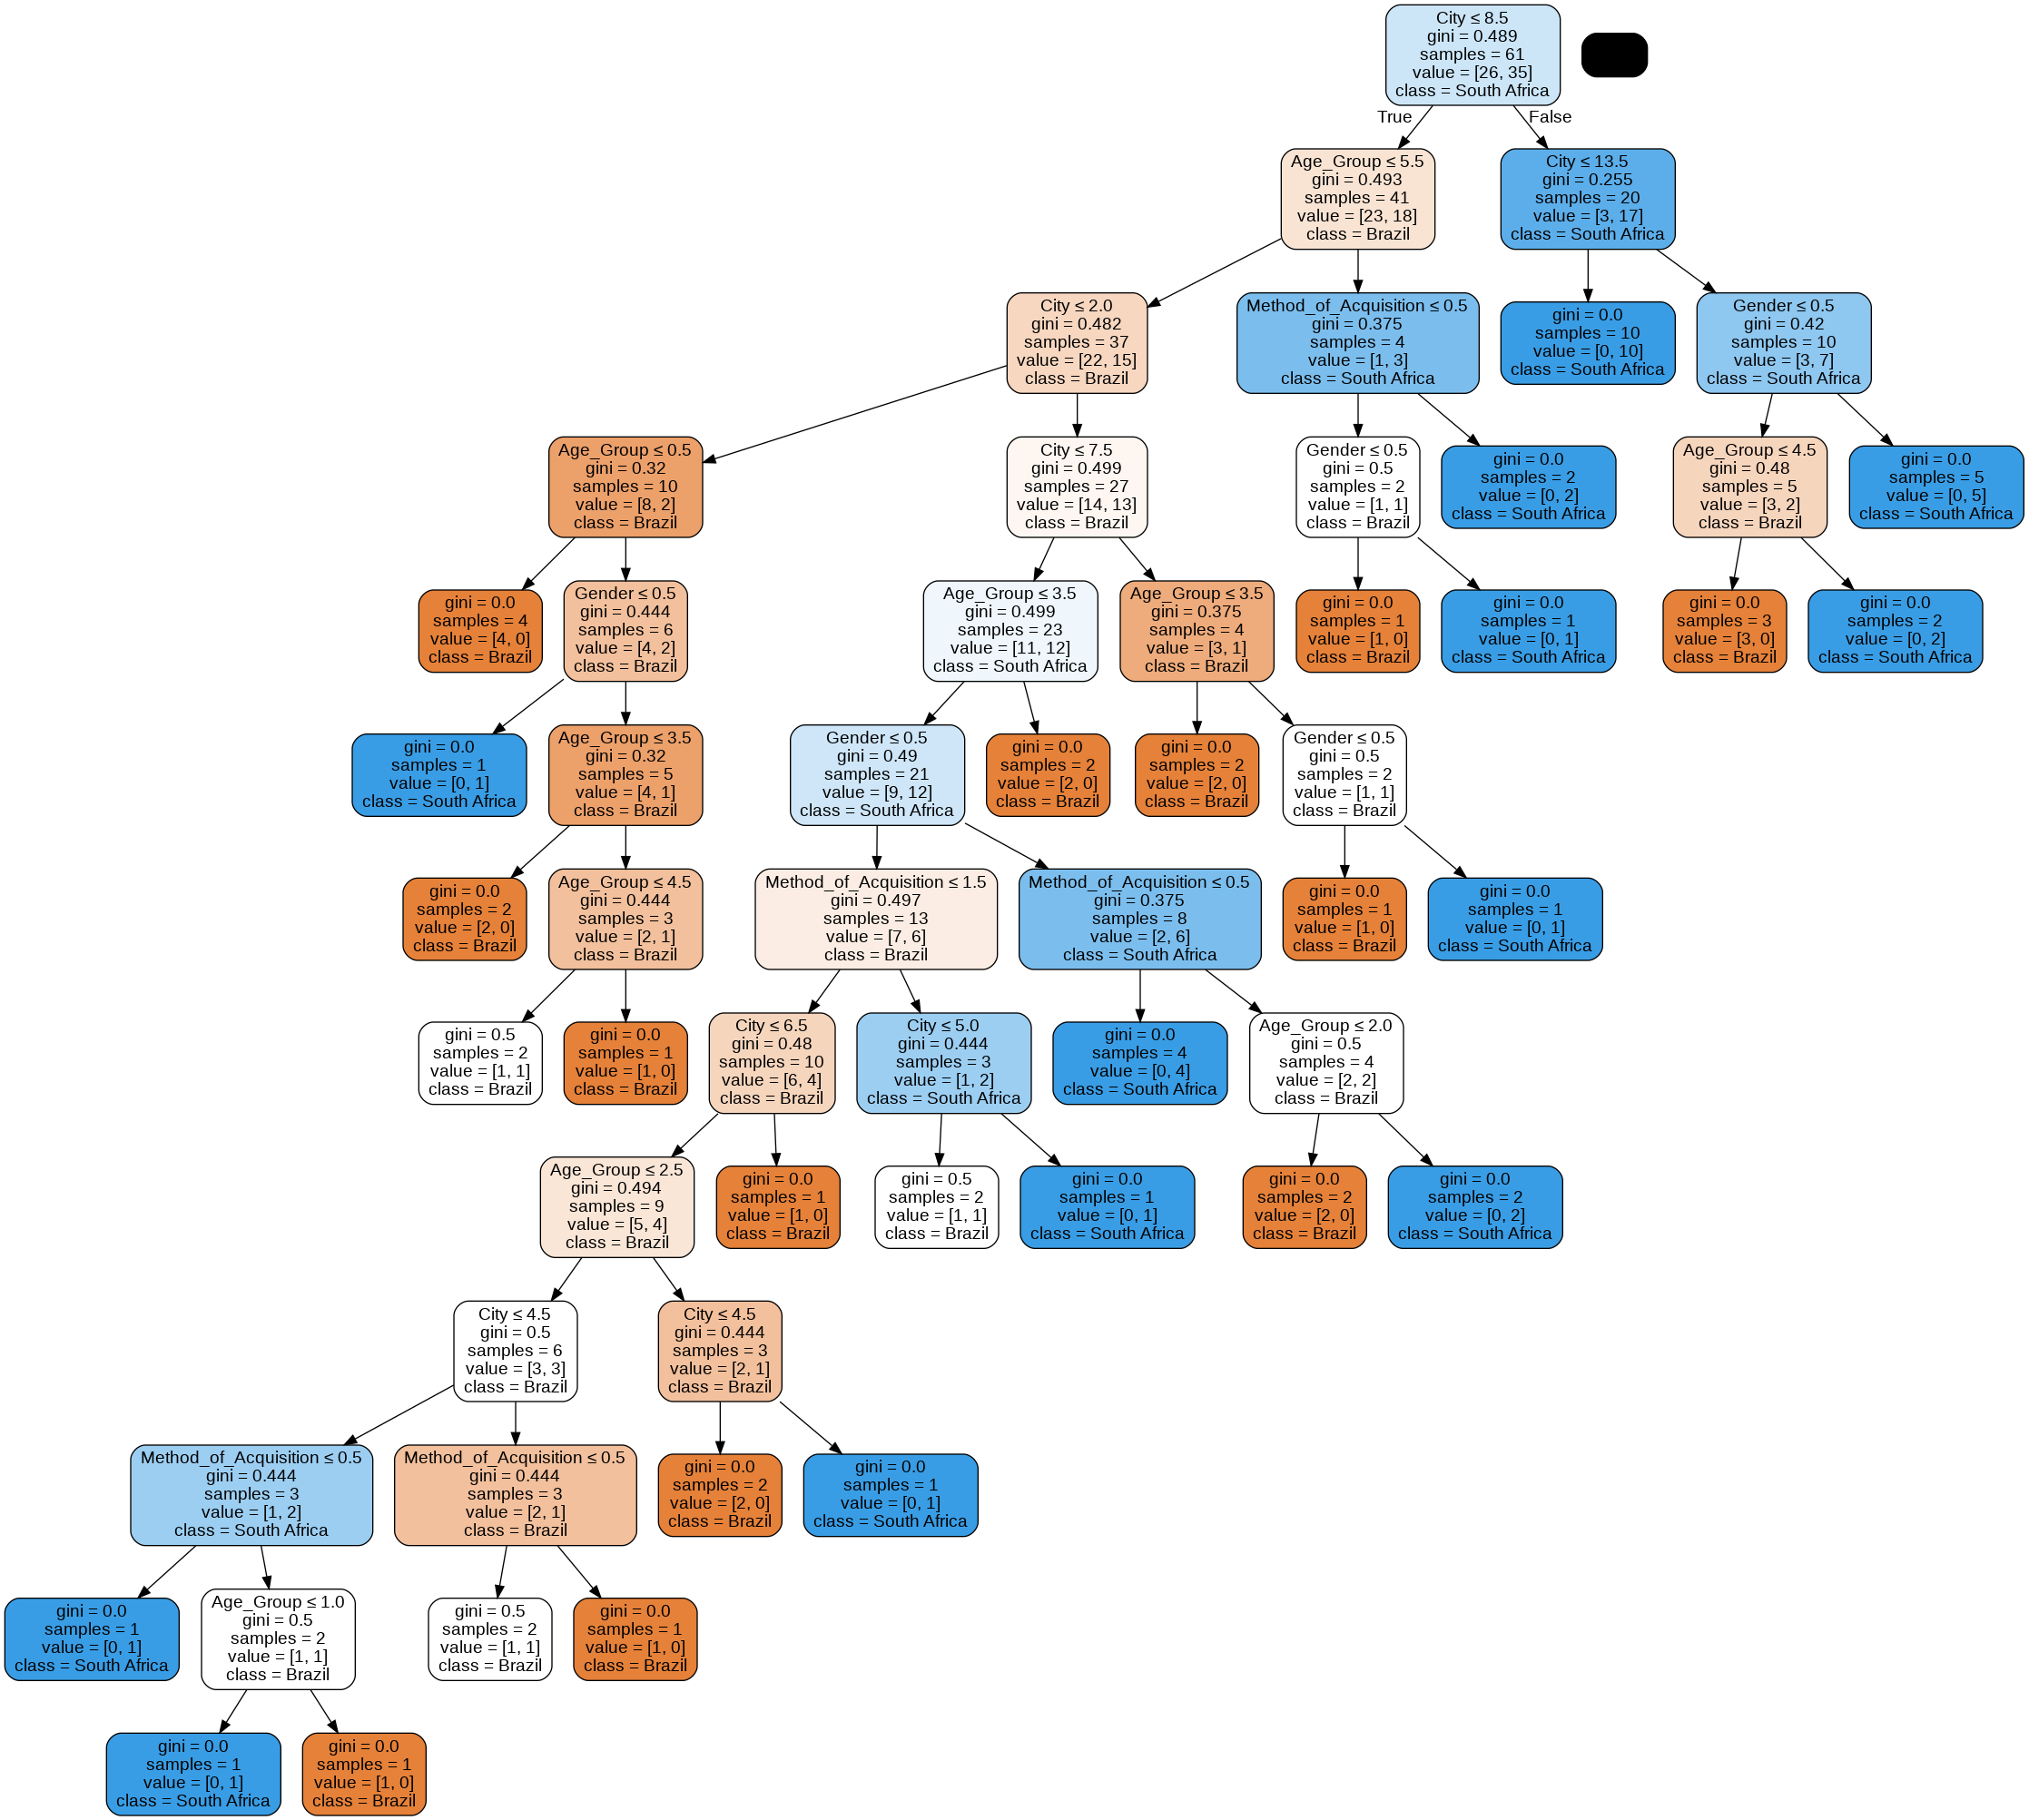

In [ ]:
#South Africa vs Brazil:
sa_bra_month = []
sa_bra_year = []
sa_bra_age_group = []
sa_bra_gender = []
sa_bra_moa = []
sa_bra_city = []
sa_bra_variant = []

for c in range(20911):
  if new_dataframe['Variants'][c] == 'South Africa' or new_dataframe['Variants'][c] == 'Brazil':
    sa_bra_month.append(new_dataframe['Month'][c])
    sa_bra_year.append(new_dataframe['Year'][c])
    sa_bra_age_group.append(new_dataframe['Age_Group'][c])
    sa_bra_gender.append(new_dataframe['Gender'][c])
    sa_bra_moa.append(new_dataframe['Method_of_Acquisition'][c])
    sa_bra_city.append(new_dataframe['City'][c])
    sa_bra_variant.append(new_dataframe['Variants'][c])

sa_bra_data = {'Month': sa_bra_month,
            'Year': sa_bra_year,
            'Age_Group': sa_bra_age_group,
            'Gender': sa_bra_gender,
            'Method_of_Acquisition': sa_bra_moa,
            'City': sa_bra_city,
            'Variants': sa_bra_variant}

sa_bra_dataframe = pd.DataFrame(sa_bra_data, columns=['Month', 'Year', 'Age_Group', 'Gender', 'Method_of_Acquisition', 'City', 'Variants'])

feature_cols = ['Age_Group', 'Gender', 'Method_of_Acquisition', 'City']
X = sa_bra_dataframe[feature_cols] # Features
y = sa_bra_dataframe.Variants # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Brazil','South Africa'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())